<a href="https://colab.research.google.com/github/aadibrly/Logistic-Regression-Project---Titanic-Survival/blob/main/Logistic_Regression_Project_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [306]:
# Import necessary libraries for data manipulation, visualization, and machine learning.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Importing the dataset

Link :https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

In [307]:
# Load the Titanic dataset from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

# Data Analysis

In [308]:
# Display the first 5 rows of the DataFrame.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [309]:
# Display the last 5 rows of the DataFrame.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [310]:
# Display the shape of the DataFrame (number of rows and columns).
df.shape

(891, 12)

In [311]:
# Display concise summary of the DataFrame, including data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [312]:
# Check for missing values in each column.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

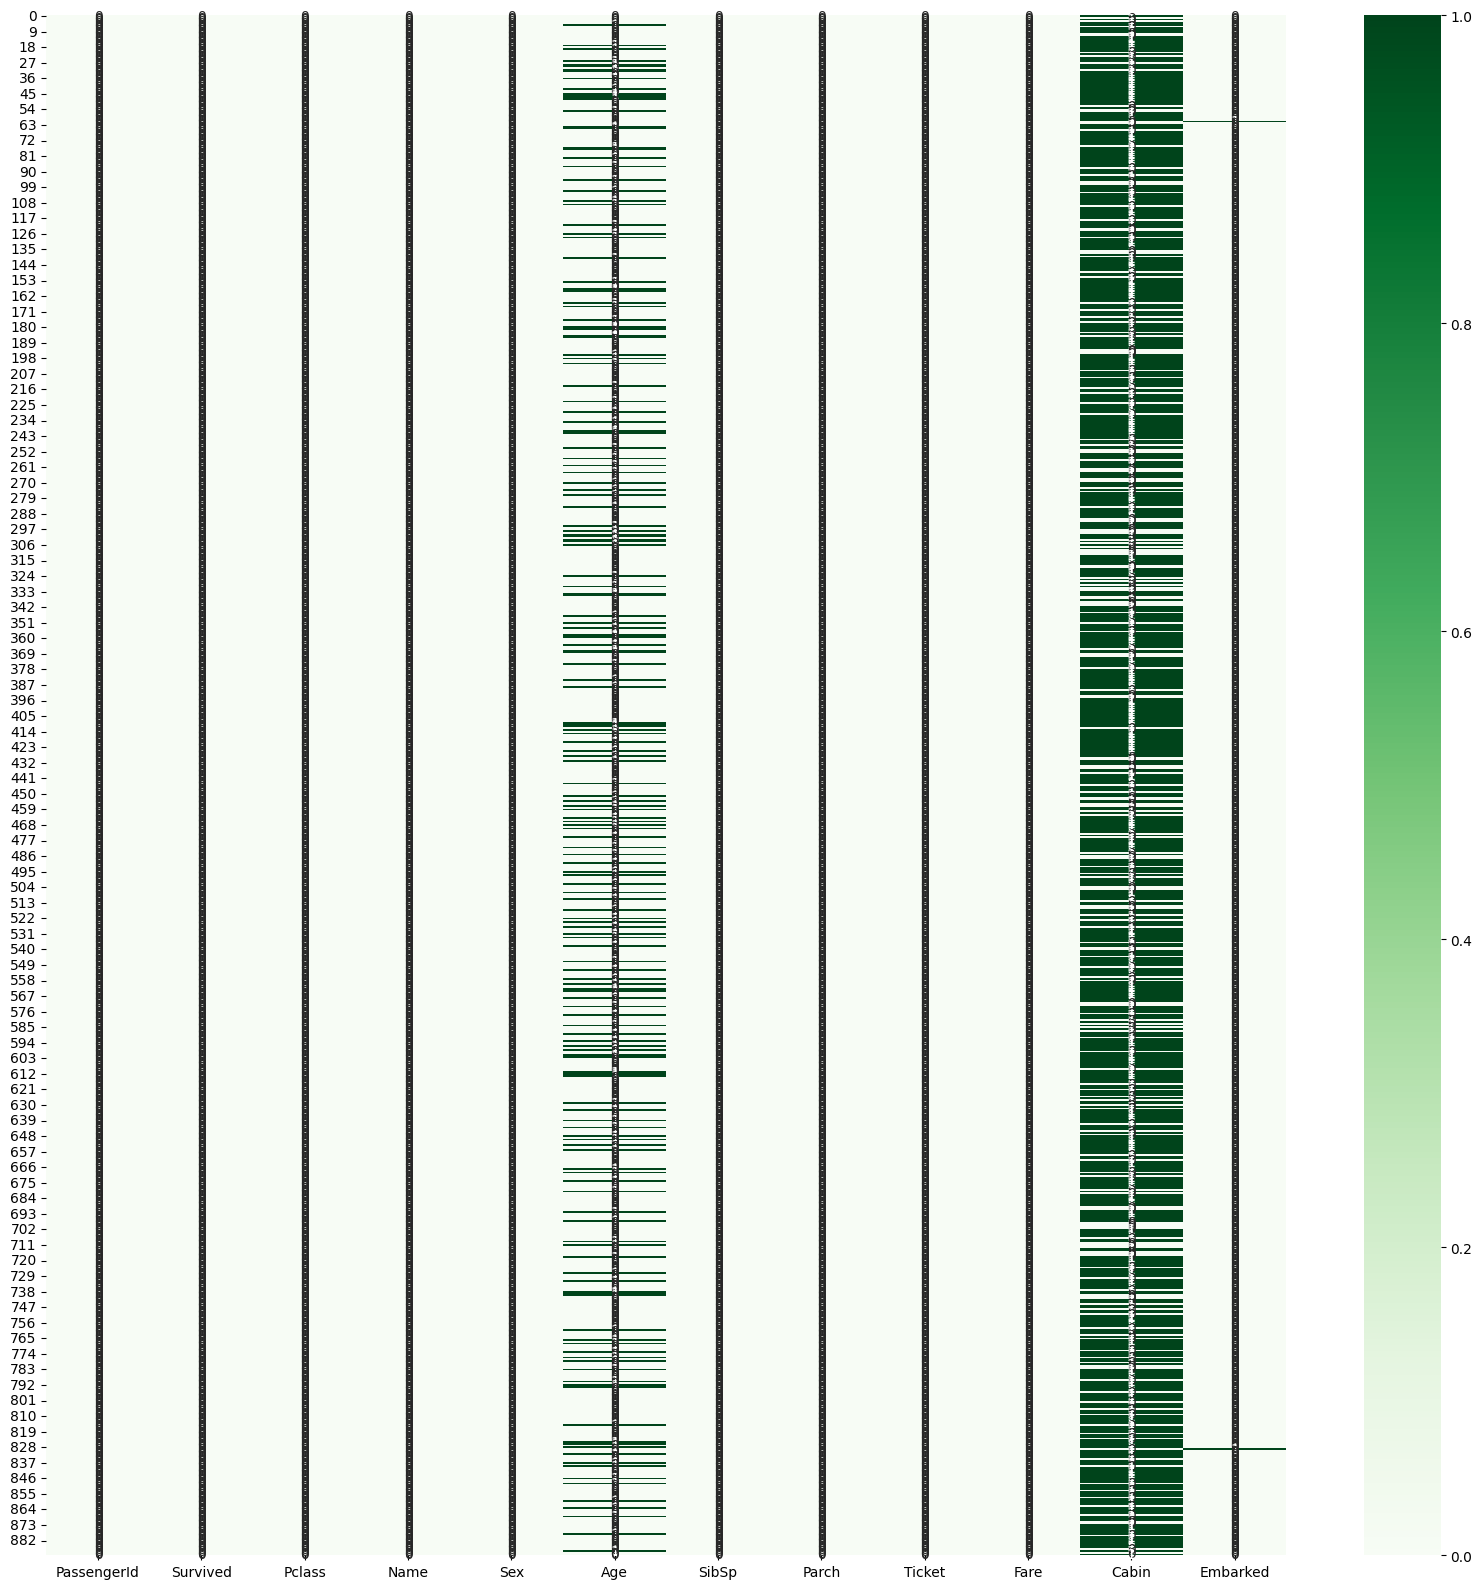

In [313]:
# Visualize missing values using a heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), annot=True, cmap='Greens')
# The heatmap shows the distribution of missing values across the DataFrame.

In [314]:
# Calculate the percentage of missing values in the 'Age' column.
print((df.Age.isnull().sum()/len(df.Age))*100)

19.865319865319865


In [315]:
# Calculate the percentage of missing values in the 'Cabin' column.
print((df.Cabin.isnull().sum()/len(df.Cabin))*100)

77.10437710437711


In [316]:
# Display unique values in the 'Cabin' column.
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [317]:
# Display the first 5 rows of the DataFrame.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [318]:
# Sort the DataFrame by the 'Cabin' column to analyze missing values in relation to 'Fare'.
arranged = df.Cabin.sort_values()

In [319]:
# Create a new DataFrame with 'Cabin' and 'Fare' columns, preserving the sorted order.
# arranged_fare = arranged.index.map(df.Fare)
# new_df = pd.DataFrame({'Cabin': arranged, 'Fare': arranged_fare})

new_df = df.loc[arranged.index, ['Cabin', 'Fare']].reset_index(drop=True) # syntax iloc[rows,columns]

In [320]:
# Display the first 30 rows of the new DataFrame.
new_df.head(30) # We cannot fill all NaN values in 'Cabin' based on 'Fare' as there's no clear relationship.

,Cabin,Fare
0,A10,40.1250
1,A14,52.0000
2,A16,39.6000
3,A19,26.0000
4,A20,56.9292
5,A23,30.0000
6,A24,50.4958
7,A26,35.5000
8,A31,31.0000
9,A32,50.0000


**Dropping colum [cabin]**

* the persentage of missing values are upto 77%
* there is no logical way to predict or fill the cabin number or any features available

In [321]:
# Drop the 'Cabin' column due to a high percentage of missing values.
df.drop('Cabin', axis=1, inplace=True)

In [322]:
# Display the first 5 rows of the DataFrame after dropping 'Cabin'.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Checking column embarked**

In [323]:
# Display unique values in the 'Embarked' column.
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [324]:
# Display rows with missing 'Embarked' values.
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [325]:
# Count the occurrences of each 'Embarked' port for passengers in Pclass 1.
df.loc[df.Pclass==1, 'Embarked'].value_counts()

,count
Embarked,
S,127
C,85
Q,2


In [326]:
# Count the occurrences of each 'Embarked' port for passengers in Pclass 2.
df.loc[df.Pclass==2, 'Embarked'].value_counts()

,count
Embarked,
S,164
C,17
Q,3


In [327]:
# Count the occurrences of each 'Embarked' port for passengers in Pclass 3.
df.loc[df.Pclass==3, 'Embarked'].value_counts()

,count
Embarked,
S,353
Q,72
C,66


*The null hypothesis havnt to be true here with pclass*

In [328]:
# Check 'Embarked' values for passengers with a specific 'Fare' (testing a hypothesis).
df.loc[df.Fare==80.0, 'Embarked'] # trying out fair (positive null hypothesis)

,Embarked
61,NaN
829,NaN


In [329]:
# Check 'Embarked' values for passengers with a specific 'Ticket' (testing a hypothesis).
df.loc[df.Ticket==113572, 'Embarked'] # trying out Tickets colum (positive null hypothesis)

,Embarked


*Therefore dropping those 2 columns wont make any imapct - dropping 2 rows*

In [330]:
# Display rows with missing 'Embarked' values before dropping them.
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [331]:
# Drop rows with missing 'Embarked' values and reset the index.
drop = df.loc[df.Embarked.isnull()].index
df.drop(drop, inplace=True)
df.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


*Column Age*

In [332]:
# Display the 'Age' column.
df.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [333]:
# Calculate the mean of the 'Age' column.
df.Age.mean()

np.float64(29.64209269662921)

In [334]:
# Calculate the median of the 'Age' column.
df.Age.median()

28.0

In [335]:
# Calculate the mode of the 'Age' column.
df.Age.mode()

,Age
0,24.0


<Axes: ylabel='Age'>

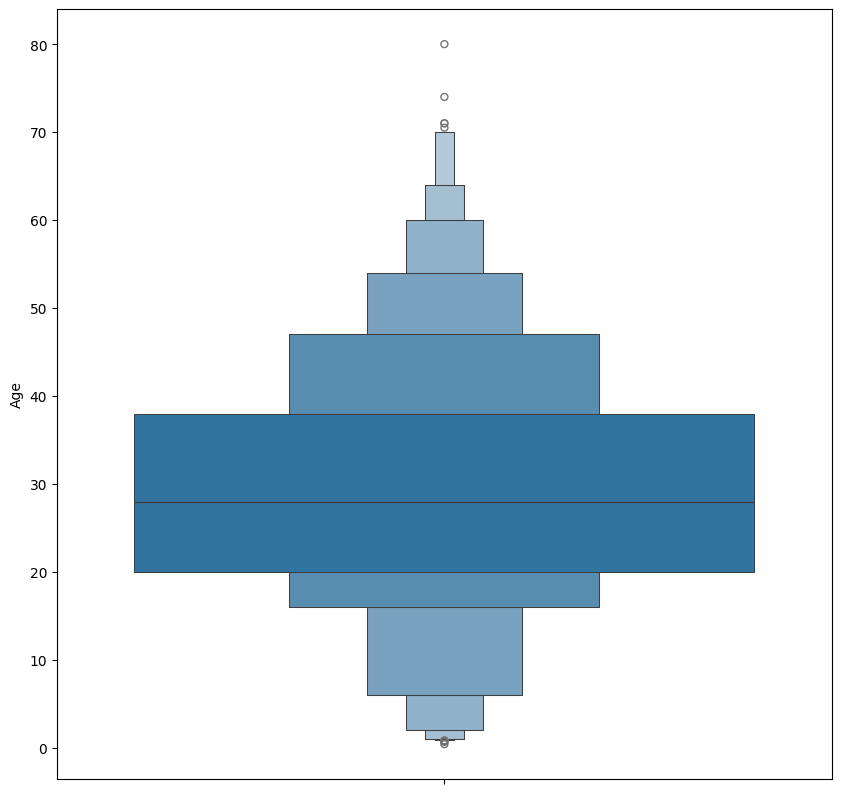

In [336]:
# Visualize the distribution of the 'Age' column using a boxen plot.
plt.figure(figsize=(10,10))
sns.boxenplot(df.Age)

In [337]:
# Count the occurrences of each age in the 'Age' column.
df.Age.value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


***Choosing median to fill nan values becaus it stand the higher priority tan the mean and mode***

In [338]:
# Fill missing values in the 'Age' column with the median age.
df.Age.fillna(value=df.Age.median(), inplace=True)

In [339]:
# Check for remaining missing values after filling 'Age'.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [340]:
# Display the first 5 rows of the DataFrame after handling missing values.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [341]:
# Drop irrelevant columns ('PassengerId', 'Name', 'Ticket').
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

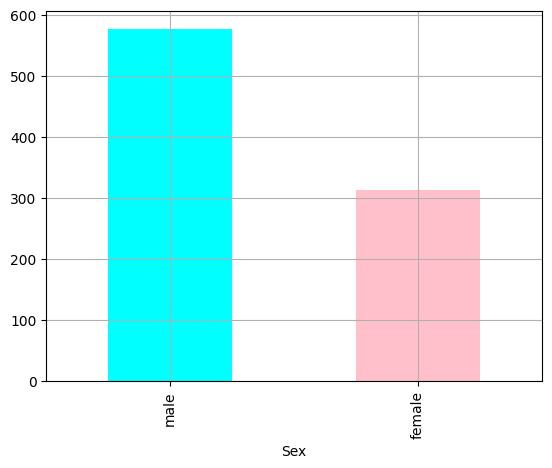

In [342]:
# Plot the count of males and females.
cound = df.Sex.value_counts() # makes series with male and femail alog with its cound
color = ['cyan' if i == 'male' else 'pink' for i in cound.index] # if i == male then blue else pink where i is the index
cound.plot.bar(color=color)
plt.grid()

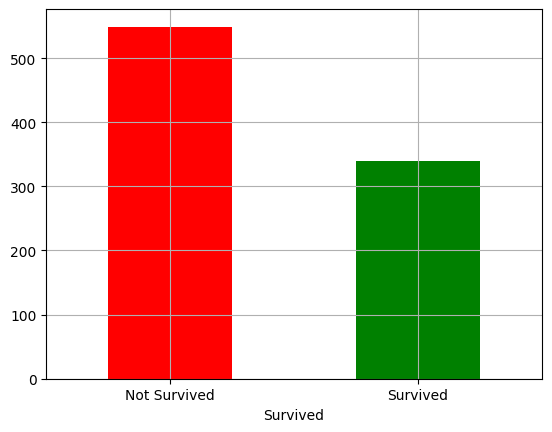

In [343]:
# Plot the count of survived and not survived individuals.
counts = df.Survived.value_counts()
color = ['green' if i == 1 else 'red' for i in counts.index]
counts.plot.bar(color=color)
plt.xticks([0,1],['Not Survived','Survived'], rotation=0)
plt.grid()


# sns.countplot(x='Survived', data=df)
# plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)
# plt.show()

In [344]:
# Display the first 5 rows of the DataFrame for survived individuals.
df.loc[df.Survived==1].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [345]:
# Count the number of survived males and females.
df.loc[df.Survived==1, 'Sex'].value_counts()

,count
Sex,
female,231
male,109


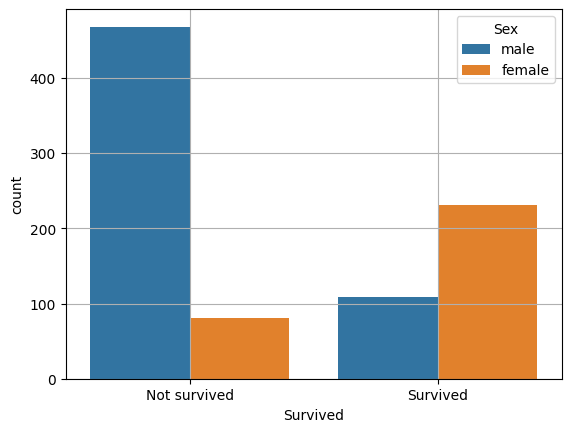

In [346]:
# Plot the count of survived and not survived individuals based on sex.
sns.countplot(x='Survived', data=df, hue='Sex')
plt.xticks([0,1],['Not survived','Survived'])
plt.grid()

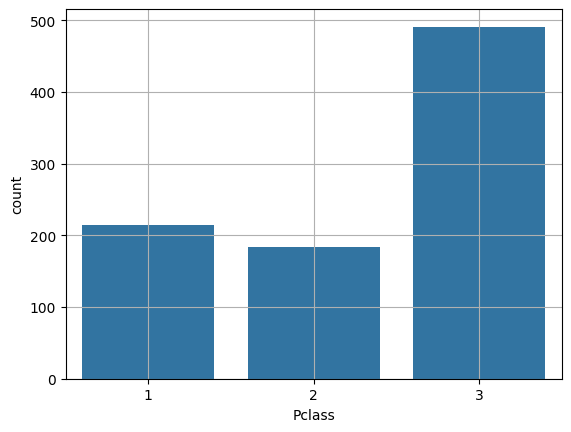

In [347]:
# Plot the count of passengers in each Pclass.
sns.countplot(x='Pclass', data=df)
plt.grid()

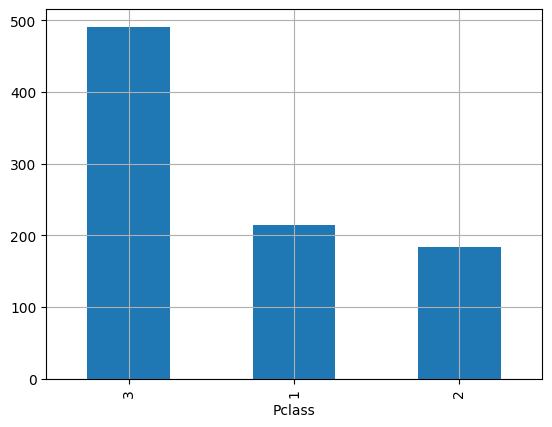

In [348]:
# Plot the count of passengers in each Pclass using a bar plot.
df.Pclass.value_counts().plot.bar()
plt.grid()

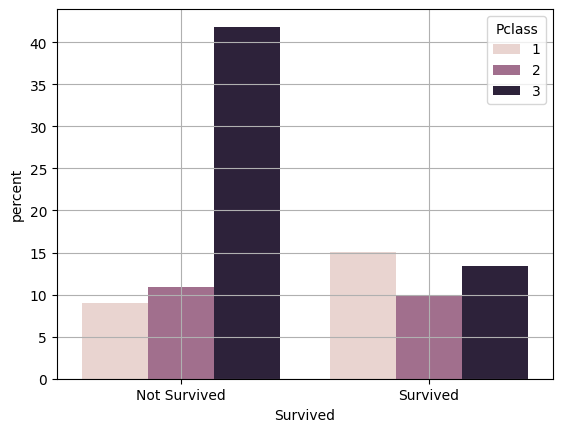

In [349]:
# Plot the percentage of survived and not survived individuals based on Pclass.
sns.countplot(x='Survived',data=df, hue='Pclass', stat='percent')
plt.xticks([0,1],['Not Survived','Survived'])
plt.grid()

In [350]:
# Display the first 5 rows of the DataFrame.
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoders - To convert the data from catagotical from to numerical form without changing its meaning

In [351]:
# Import LabelEncoder for categorical feature encoding.
from sklearn.preprocessing import LabelEncoder

In [352]:
# Apply Label Encoding to the 'Sex' column (male: 1, female: 0).
enc = LabelEncoder()
df.Sex = enc.fit_transform(df.Sex)

In [353]:
# Display the DataFrame after Label Encoding 'Sex'.
df
# male - 1
# female - 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [354]:
# Convert the 'Age' column to integer type.
df.Age = df.Age.astype(int)

In [355]:
# Round the 'Fare' column to 2 decimal places.
df.Fare = df.Fare.round(2)

In [356]:
# Display concise summary of the DataFrame after data type conversions.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


In [357]:
# Apply One-Hot Encoding to the 'Embarked' column.
newdf0 = df.copy()
newdf0 = pd.get_dummies(newdf0).astype(int)

In [358]:
# Update the DataFrame with the one-hot encoded 'Embarked' column.
df = newdf0

In [359]:
# Display the first 5 rows of the DataFrame after One-Hot Encoding.
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7,0,0,1
1,1,1,0,38,1,0,71,1,0,0
2,1,3,0,26,0,0,7,0,0,1
3,1,1,0,35,1,0,53,0,0,1
4,0,3,1,35,0,0,8,0,0,1


In [360]:
# Drop one of the one-hot encoded 'Embarked' columns to avoid multicollinearity.
df.drop('Embarked_Q', axis=1, inplace=True)

In [361]:
# Display the first 5 rows of the DataFrame after dropping a column.
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,0,3,1,22,1,0,7,0,1
1,1,1,0,38,1,0,71,1,0
2,1,3,0,26,0,0,7,0,1
3,1,1,0,35,1,0,53,0,1
4,0,3,1,35,0,0,8,0,1


In [362]:
# Display concise summary of the final DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    889 non-null    int64
 1   Pclass      889 non-null    int64
 2   Sex         889 non-null    int64
 3   Age         889 non-null    int64
 4   SibSp       889 non-null    int64
 5   Parch       889 non-null    int64
 6   Fare        889 non-null    int64
 7   Embarked_C  889 non-null    int64
 8   Embarked_S  889 non-null    int64
dtypes: int64(9)
memory usage: 69.5 KB


<Axes: >

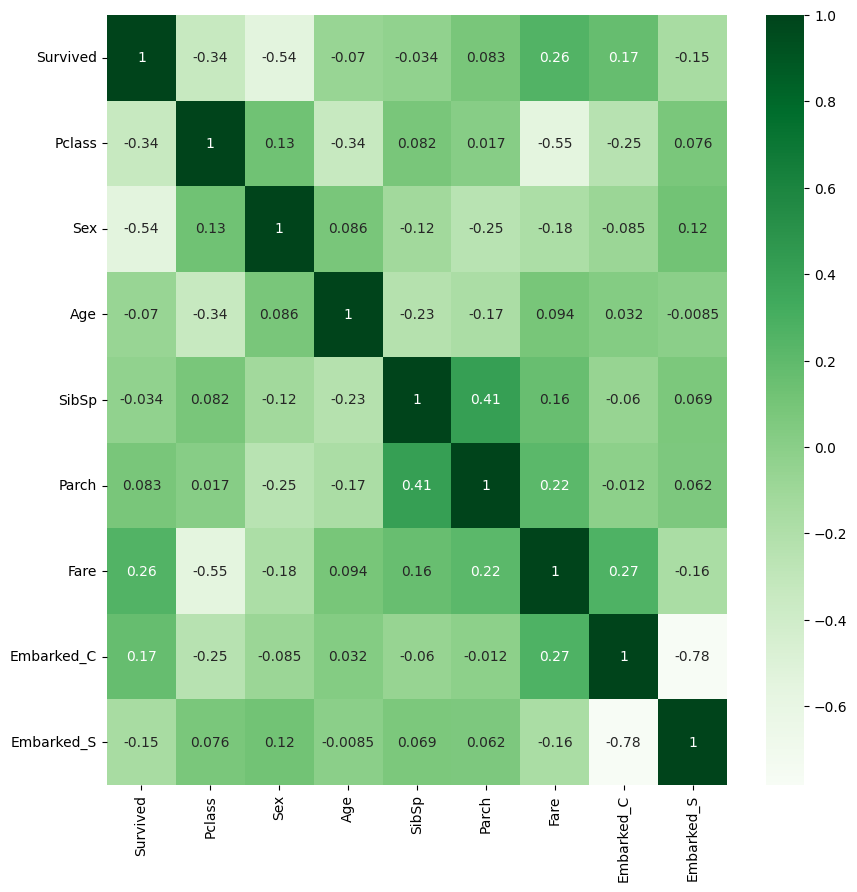

In [363]:
# Visualize the correlation matrix using a heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

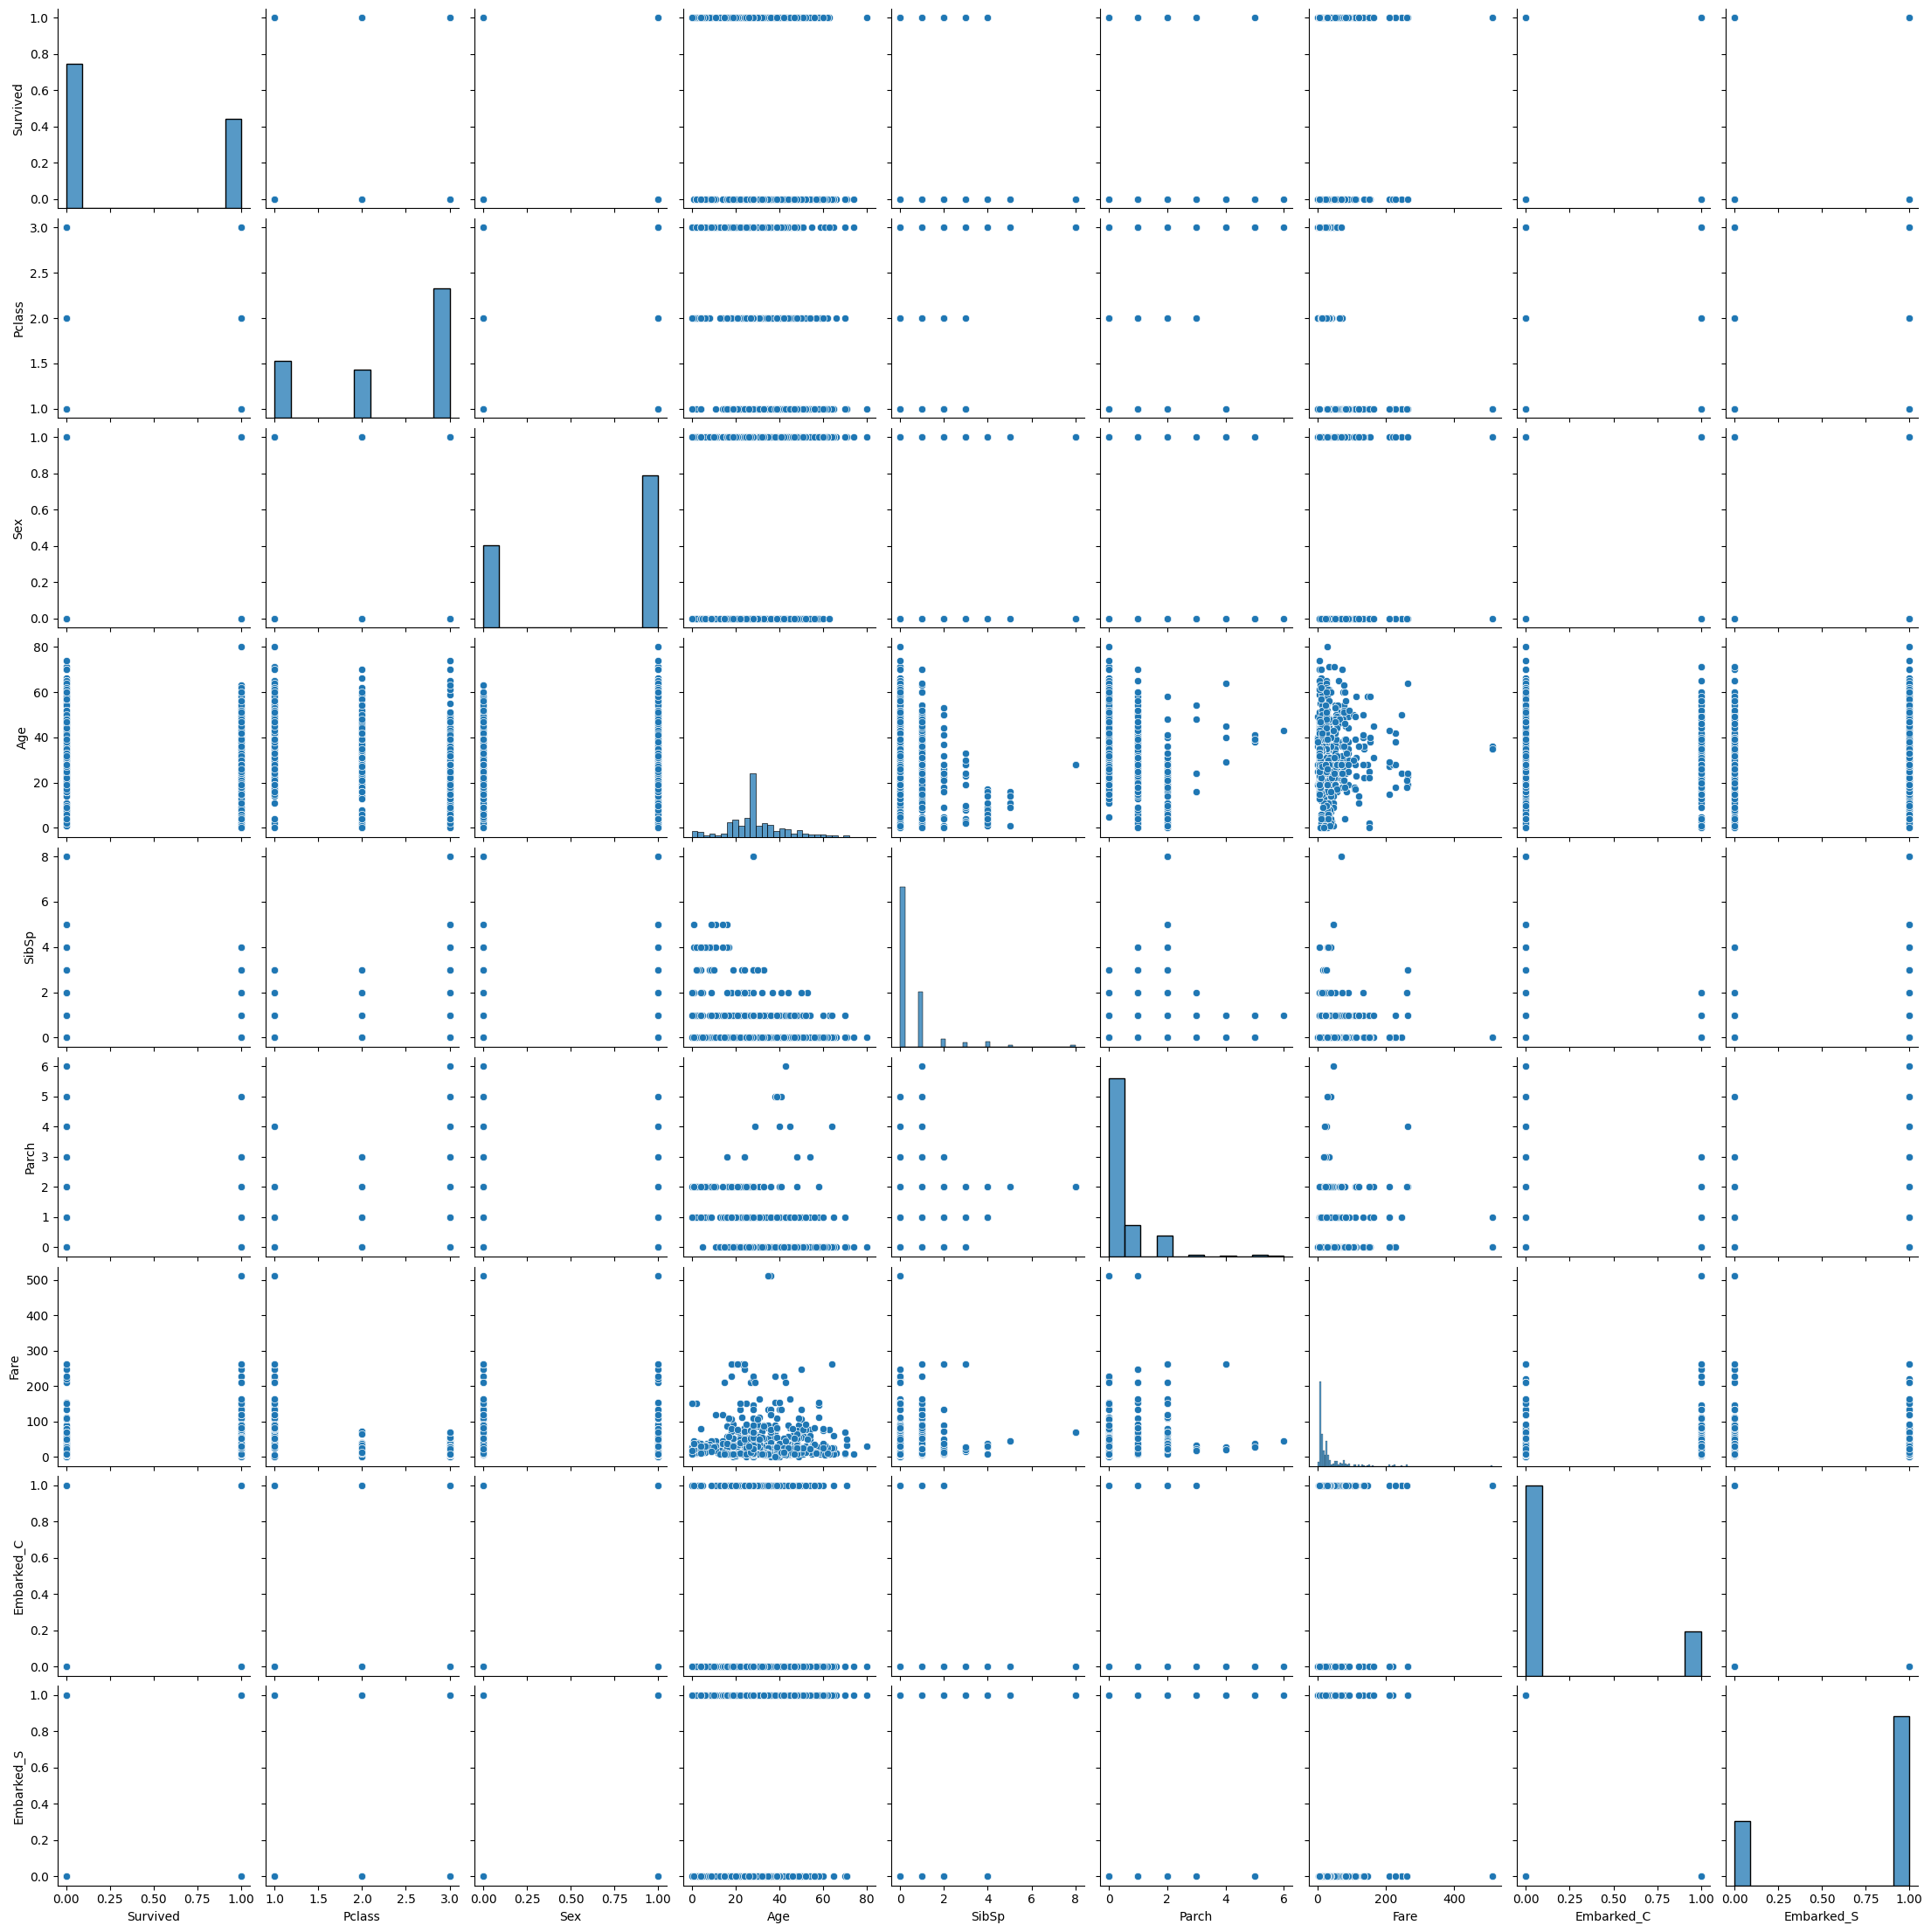

In [364]:
# Generate pairwise plots for all columns to visualize relationships.
sns.pairplot(df)

# Feature Importance / Feature Selection

In [217]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,0,3,1,22,1,0,7,0,1
1,1,1,0,38,1,0,71,1,0
2,1,3,0,26,0,0,7,0,1
3,1,1,0,35,1,0,53,0,1
4,0,3,1,35,0,0,8,0,1


In [365]:
# Separate features (X) and target variable (y).
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [366]:
# Import ExtraTreesClassifier for feature importance analysis.
from sklearn.ensemble import ExtraTreesClassifier

In [367]:
# Initialize and train the ExtraTreesClassifier model to determine feature importance.
fex = ExtraTreesClassifier()
fex.fit(X,y)

ExtraTreesClassifier()

In [368]:
# Display the feature importances calculated by the model.
fex.feature_importances_

array([0.11305295, 0.29663807, 0.27158183, 0.0490808 , 0.04758424,
       0.18785074, 0.01723343, 0.01697793])

In [369]:
# Create a pandas Series of feature importances with column names as index.
f_importance = pd.Series(fex.feature_importances_, index=X.columns)

In [370]:
# Display the feature importances.
f_importance

,0
Pclass,0.113053
Sex,0.296638
Age,0.271582
SibSp,0.049081
Parch,0.047584
Fare,0.187851
Embarked_C,0.017233
Embarked_S,0.016978


<Axes: >

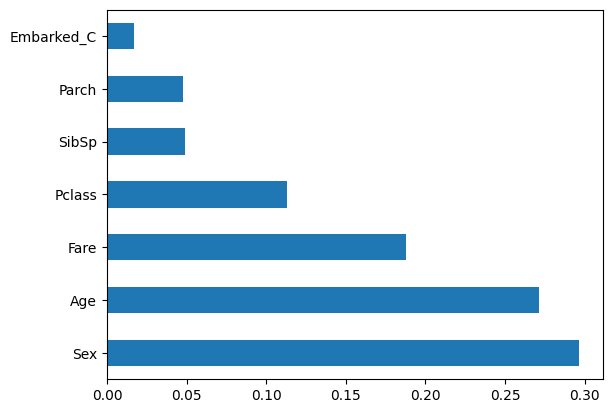

In [371]:
# Plot the top 7 most important features.
f_importance.nlargest(7).plot.barh()

# Splitting the data

In [372]:
# Initialize StratifiedKFold for splitting data while preserving the proportion of the target variable.
skf = StratifiedKFold(n_splits=5)

In [373]:
# Split the data into training and testing sets using StratifiedKFold.
for train_index, test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [374]:
# Display the training features.
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,3,1,22,1,0,7,0,1
1,1,0,38,1,0,71,1,0
2,3,0,26,0,0,7,0,1
3,1,0,35,1,0,53,0,1
4,3,1,35,0,0,8,0,1
...,...,...,...,...,...,...,...,...
714,2,1,52,0,0,13,0,1
715,3,1,19,0,0,7,0,1
718,3,1,28,0,0,15,0,0
719,3,1,33,0,0,7,0,1


In [375]:
# Display the testing features.
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
706,2,0,45,0,0,13,0,1
707,1,1,42,0,0,26,0,1
708,1,0,22,0,0,151,0,1
709,3,1,28,1,1,15,1,0
710,1,0,24,0,0,49,1,0
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13,0,1
887,1,0,19,0,0,30,0,1
888,3,0,28,1,2,23,0,1
889,1,1,26,0,0,30,1,0


In [376]:
# Display the training target variable.
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
714,0
715,0
718,0
719,0


In [377]:
# Display the testing target variable.
y_test

,Survived
706,1
707,1
708,1
709,1
710,1
...,...
886,0
887,1
888,0
889,1


# Model Selection

In [378]:
# Create and train a Logistic Regression model with StandardScaler in a pipeline.
model = make_pipeline(StandardScaler(),LogisticRegression(max_iter=2000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [379]:
# Make predictions on the test set.
y_pred = model.predict(X_test)

# EDA

In [380]:
# Create a DataFrame to compare actual and predicted values.
final = pd.DataFrame({'Actual values':y_test, 'Predicted values':y_pred})
final

,Actual values,Predicted values
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


<Axes: >

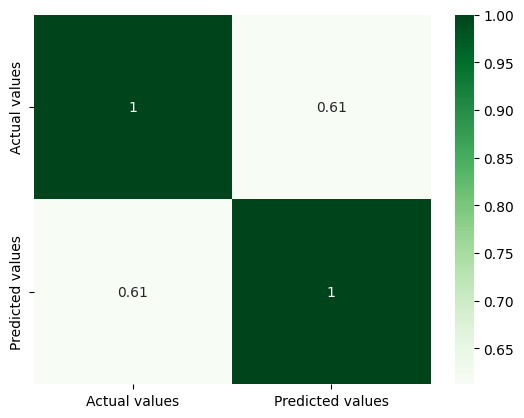

In [381]:
# Visualize the correlation between actual and predicted values using a heatmap.
sns.heatmap(final.corr(), annot=True, cmap='Greens')

# Perfomance Matricx

In [382]:
# Calculate the confusion matrix to evaluate the classification model.
confusion_matrix(y_test, y_pred)

array([[97, 12],
       [20, 48]])

In [383]:
# Generate a classification report with precision, recall, and f1-score.
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       109\n           1       0.80      0.71      0.75        68\n\n    accuracy                           0.82       177\n   macro avg       0.81      0.80      0.80       177\nweighted avg       0.82      0.82      0.82       177\n'

In [384]:
# Manually calculate the accuracy of the model.
# accuracy = (TN+TP)/Total
(97 + 48) / 177 # where 177 is the total sum of test data

0.8192090395480226

In [385]:
# Calculate the accuracy score using scikit-learn's accuracy_score function.
from sklearn.metrics import accuracy_score as accuracy

accuracy(y_test,y_pred)

0.8192090395480226

# Exportation of model and Dataset (Dumping)

module - pickle

Serialization - Deserialization

Dumping - Undumping

Pickling - Unpickling

In [386]:
# Import the pickle module for object serialization.
import pickle

In [387]:
# Serialize the trained model using pickle.
pick = pickle.dumps(model)

In [388]:
# unpickle = pickle.load(pick)